In [444]:
import torch
import torch.nn as nn

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [446]:
train_data=pd.read_csv("CPI/data/CPI.csv",encoding="gbk")


In [447]:
print(train_data.shape)
print(test_data.shape)

(36, 8)
(3, 8)


In [448]:
train_data.head()
#2018年1月---2020年12月

,食品类,粮食类,畜肉类,蛋类,水产品,鲜菜类,鲜果类,CPI
0,99.5,101.2,94.1,114.2,102.4,94.2,106.4,101.5
1,104.4,101.1,96.9,122.5,108.7,117.7,108.7,102.9
2,102.1,101.1,93.9,117.6,105.6,108.8,107.4,102.1
3,100.7,101.0,91.2,114.9,102.8,108.2,104.2,101.8
4,100.1,100.9,90.7,120.8,100.6,110.0,97.3,101.8


In [449]:
food=torch.tensor(train_data["食品类"])
cereals=torch.tensor(train_data["粮食类"])
meat=torch.tensor(train_data["畜肉类"])
egg=torch.tensor(train_data["蛋类"])
water=torch.tensor(train_data["水产品"])
vegetable=torch.tensor(train_data["鲜菜类"])
fruit=torch.tensor(train_data["鲜果类"])
cpi=torch.tensor(train_data["CPI"])

In [450]:
cpi

tensor([101.5000, 102.9000, 102.1000, 101.8000, 101.8000, 101.9000, 102.1000,
        102.3000, 102.5000, 102.5000, 102.2000, 101.9000, 101.7000, 101.5000,
        102.3000, 102.5000, 102.7000, 102.7000, 102.8000, 102.8000, 103.0000,
        103.8000, 104.5000, 104.5000, 105.4000, 105.2000, 104.3000, 103.3000,
        102.4000, 102.5000, 102.7000, 102.4000, 101.7000, 100.5000,  99.5000,
        100.2000])

In [451]:
per_data=[]
for i in train_data.columns:
    per_data.append(torch.tensor(train_data[i]))

In [452]:
class PearsonCorrelation(nn.Module):
    def forward(self,tensor_1,tensor_2):
        x = tensor_1
        y = tensor_2

        vx = x - torch.mean(x)
        vy = y - torch.mean(y)

        cost = torch.sum(vx * vy) / (torch.sqrt(torch.sum(vx ** 2)) * torch.sqrt(torch.sum(vy ** 2)))
        return cost

pearson=PearsonCorrelation()
# PC=pearson(food,cpi)
# print(PC)

In [453]:
pc_list=[]
for i in per_data:

    result=pearson(i,cpi)
    pc_list.append(result)

In [454]:
pc_list

[tensor(0.8719),
 tensor(-0.3969),
 tensor(0.7811),
 tensor(0.2888),
 tensor(0.2089),
 tensor(-0.0601),
 tensor(-0.1384),
 tensor(1.)]

In [455]:
adj_gre=np.zeros(shape=(8,8),dtype=np.double)

In [456]:
for i in range(8):
    adj_gre[i][i]=1
    adj_gre[7][i]=pc_list[i]
    adj_gre[i][7]=pc_list[i]  

In [457]:
adj_gre.shape

(8, 8)

In [458]:
adj_gre=pd.DataFrame(adj_gre)

# 邻接矩阵

In [459]:
adj=torch.from_numpy(adj_gre.values)

In [460]:
x_train=train_data.values
x_train=torch.from_numpy(x_train)
x_train=x_train.t()

In [461]:
x_train

tensor([[ 99.5000, 104.4000, 102.1000, 100.7000, 100.1000, 100.3000, 100.5000,
         101.7000, 103.6000, 103.3000, 102.5000, 102.5000, 101.9000, 100.7000,
         104.1000, 106.1000, 107.7000, 108.3000, 109.1000, 110.0000, 111.2000,
         115.5000, 119.1000, 117.4000, 120.6000, 121.9000, 118.3000, 114.8000,
         110.6000, 111.1000, 113.2000, 111.2000, 107.9000, 102.2000,  98.0000,
         101.2000],
        [101.2000, 101.1000, 101.1000, 101.0000, 100.9000, 100.7000, 100.6000,
         100.5000, 100.5000, 100.6000, 100.6000, 100.5000, 100.5000, 100.5000,
         100.4000, 100.4000, 100.5000, 100.6000, 100.6000, 100.7000, 100.6000,
         100.5000, 100.7000, 100.6000, 100.5000, 100.7000, 100.7000, 101.2000,
         101.5000, 101.6000, 101.6000, 101.5000, 101.5000, 101.5000, 101.4000,
         101.4000],
        [ 94.1000,  96.9000,  93.9000,  91.2000,  90.7000,  93.2000,  95.1000,
          98.0000,  99.6000, 100.4000, 100.8000, 100.8000, 100.2000,  99.1000,
         104

In [462]:
from sklearn.preprocessing import MinMaxScaler
train_data_normalized_list=[]
scaler = MinMaxScaler(feature_range=(-1, 1))
for i in x_train:
    train_data_normalized = scaler.fit_transform(i.reshape(-1, 1))
    train_data_normalized_list.append(train_data_normalized)

In [463]:
for i in train_data_normalized_list:
    print(i.shape)

(36, 1)
(36, 1)
(36, 1)
(36, 1)
(36, 1)
(36, 1)
(36, 1)
(36, 1)


In [464]:
train_window = 6
def create_inout_sequences(input_data, tw):
    inout_seq = []
    lables_list=[]
    L = len(input_data)
    print(L)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append(train_seq)
        lables_list.append(train_label)
    return inout_seq,lables_list

In [465]:
train_inout_seq_list=[]
train_labels=[]
for i in train_data_normalized_list:
    
    train_inout_seq,labels = create_inout_sequences(i, train_window)
    train_inout_seq_list.append(train_inout_seq)
    train_labels.append(labels)

36
36
36
36
36
36
36
36


In [468]:
allData=np.concatenate(train_inout_seq_list,axis=2).transpose(0,2,1) #(30, 8, 6)
allLabel=np.reshape(np.concatenate(train_labels,axis=2).transpose(0,2,1)[ : ,-1: , : ],(-1,1))     #(30, 8, 1)

In [469]:
trainData=allData[:-6,:,:]
trainLabel=allLabel[:-6,:]
testData=allData[-6:,:,:]
testLabel=allLabel[-6:,:]

In [470]:
testData.shape

(6, 8, 6)

# 定义dataset

In [471]:
from torch.utils import data
class MyDataset(data.Dataset):
    def __init__(self,trainData,trainLabel):
        self.Data=trainData
        self.label=trainLabel
    def __getitem__(self,index):
        txt=torch.from_numpy(self.Data[index])
        label=torch.from_numpy(self.label[index])
        return txt,label
    def __len__(self):
        return len(self.Data)

In [472]:
data_set=MyDataset(trainData,trainLabel)
train_loader=data.DataLoader(data_set,6)

In [473]:
import torch.nn.functional as F
class GCN(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(GCN, self).__init__()
        self.proj = nn.Linear(in_dim, out_dim)

    def forward(self, g, h):
        h=torch.reshape(h,(8,-1))
        h = torch.matmul(g, h)
        h = self.proj(h)
        
        return h

In [474]:
from torch import nn
from torch.autograd import Variable

class lstm(nn.Module):
    def __init__(self,input_size=2,hidden_size=4,output_size=1,num_layer=2):
        super(lstm,self).__init__()
        self.layer1 = nn.LSTM(input_size,hidden_size,num_layer)
        self.layer2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        x,_ = self.layer1(x)
        s,b,h = x.size()
        x = x.view(s*b,h)
        x = self.layer2(x)
        return x

model = lstm(6, 4,1,2).double()

In [475]:

class Pool(nn.Module):

    def __init__(self, k, in_dim, p):
        super(Pool, self).__init__()
        self.k = k
        self.sigmoid = nn.Sigmoid()
        self.proj = nn.Linear(in_dim, 1)
        self.drop = nn.Dropout(p=p) if p > 0 else nn.Identity()

    def forward(self, g, h):
        Z = self.drop(h)
        weights = self.proj(Z).squeeze()
        scores = self.sigmoid(weights)
        return top_k_graph(scores, g, h, self.k)
def top_k_graph(scores, g, h, k):
    num_nodes = g.shape[0]
    values, idx = torch.topk(scores, max(0, int(k*num_nodes)))
    new_h = h[idx, :]
    values = torch.unsqueeze(values, -1)
    new_h = torch.mul(new_h, values)
    un_g = g.float()
    un_g = torch.matmul(un_g, un_g).float()
    un_g = un_g[idx, :]
    un_g = un_g[:, idx]
    g = norm_g(un_g)
    return g, new_h, idx


def norm_g(g):
    degrees = torch.sum(g, 1)
    g = g / degrees
    return g

In [476]:




class model(nn.Module):
    def __init__(self,in_dim,out_dim):
        super(model, self).__init__()
        self.gcn=GCN(36,36)
        self.LSTM=lstm(6, 4,1,2)
        self.pool=Pool(0.2,36,0.3)
        
    def forward(self,adj,x):
        x=self.gcn(adj,x)
        _,x,_=self.pool(adj,x)
        x=torch.reshape(x,(6,1,6))
        x=self.LSTM(x)
        return x


net=model(1,1).double()


    
    
    

In [477]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
loss_function=torch.nn.MSELoss()

                
for epoch in range(200):

    for i,traindata in enumerate(train_loader):
        data,label=traindata
        optimizer.zero_grad()
        y_pred = net(adj,data)
        
        single_loss = loss_function(y_pred, label)
        single_loss.backward()
        optimizer.step()
    if epoch%25 == 1:
        print(f'epoch: {epoch:3} loss: {single_loss.item():10.8f}')

epoch:   1 loss: 0.18740343
epoch:  26 loss: 0.01873259
epoch:  51 loss: 0.00117613
epoch:  76 loss: 0.00015081
epoch: 101 loss: 0.00061976
epoch: 126 loss: 0.00005253
epoch: 151 loss: 0.00000681
epoch: 176 loss: 0.00000921


In [478]:
fut_pred = 6

test_inputs = torch.tensor(testData)
test_label=testLabel
print(test_inputs)

tensor([[[ 0.8912,  1.0000,  0.6987,  0.4059,  0.0544,  0.0962],
         [-0.8333, -0.5000, -0.5000,  0.3333,  0.8333,  1.0000],
         [ 0.7750,  1.0000,  0.8019,  0.5686,  0.3767,  0.3767],
         [-0.0152, -0.0859, -0.0404, -0.2727, -0.7576, -0.8232],
         [ 0.1624, -0.0085, -0.0085, -0.0940,  0.1453,  0.3333],
         [ 0.9593,  0.5390, -0.2068, -0.4508, -0.7763,  0.0847],
         [-0.3305, -0.3473, -0.3612, -0.4840, -0.7294, -1.0000],
         [ 1.0000,  0.9322,  0.6271,  0.2881, -0.0169,  0.0169]],

        [[ 1.0000,  0.6987,  0.4059,  0.0544,  0.0962,  0.2720],
         [-0.5000, -0.5000,  0.3333,  0.8333,  1.0000,  1.0000],
         [ 1.0000,  0.8019,  0.5686,  0.3767,  0.3767,  0.4530],
         [-0.0859, -0.0404, -0.2727, -0.7576, -0.8232, -0.8687],
         [-0.0085, -0.0085, -0.0940,  0.1453,  0.3333,  0.3162],
         [ 0.5390, -0.2068, -0.4508, -0.7763,  0.0847,  0.3356],
         [-0.3473, -0.3612, -0.4840, -0.7294, -1.0000, -0.9637],
         [ 0.9322,  0.6

In [479]:
net.eval()
out=net(adj,test_inputs)


In [480]:
out

tensor([[ 0.7162],
        [ 0.2394],
        [ 0.3423],
        [ 0.3021],
        [-0.0110],
        [-0.0136]], dtype=torch.float64, grad_fn=<AddmmBackward>)

In [481]:
actual_predictions = scaler.inverse_transform(out.detach().numpy()).reshape(-1, 1)
print(actual_predictions)


actual_label = scaler.inverse_transform(test_label[-fut_pred:]).reshape(-1, 1)
print(actual_label)

[[104.56264697]
 [103.15631267]
 [103.45964003]
 [103.34110134]
 [102.4176418 ]
 [102.40983929]]
[[102.7]
 [102.4]
 [101.7]
 [100.5]
 [ 99.5]
 [100.2]]


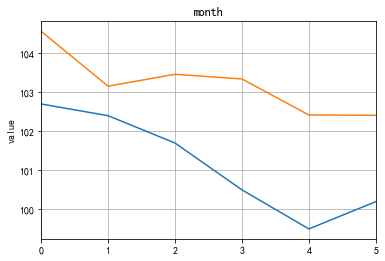

In [482]:
x = np.arange(6)
plt.title('month')
plt.ylabel('value')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(actual_label)
plt.plot(x,actual_predictions)
plt.show()

          食品类       粮食类       畜肉类        蛋类       水产品       鲜菜类       鲜果类  \
食品类  1.000000 -0.049342  0.968985 -0.138444  0.283271 -0.126693 -0.316258   
粮食类 -0.049342  1.000000  0.083879 -0.568630  0.546963  0.021034 -0.553972   
畜肉类  0.968985  0.083879  1.000000 -0.264655  0.315073 -0.257918 -0.479992   
蛋类  -0.138444 -0.568630 -0.264655  1.000000  0.010994 -0.062610  0.430803   
水产品  0.283271  0.546963  0.315073  0.010994  1.000000 -0.048382 -0.430206   
鲜菜类 -0.126693  0.021034 -0.257918 -0.062610 -0.048382  1.000000  0.035114   
鲜果类 -0.316258 -0.553972 -0.479992  0.430803 -0.430206  0.035114  1.000000   
CPI  0.871921 -0.396855  0.781103  0.288810  0.208899 -0.060072 -0.138362   

          CPI  
食品类  0.871921  
粮食类 -0.396855  
畜肉类  0.781103  
蛋类   0.288810  
水产品  0.208899  
鲜菜类 -0.060072  
鲜果类 -0.138362  
CPI  1.000000  


Text(0.5, 15.28125, 'region')

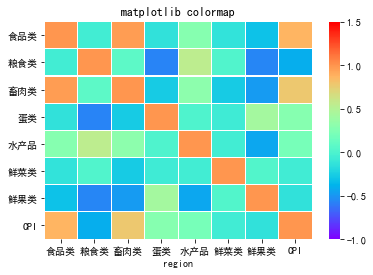

In [483]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


f, (ax2) = plt.subplots(figsize = (6,4),nrows=1)
 
# cmap用cubehelix map颜色
#cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
pt = train_data.corr()   # pt为数据框或者是协方差矩阵
print(pt)
# sns.heatmap(pt, linewidths = 0.05, ax = ax1, vmax=1.5, vmin=-1, cmap=cmap)
# ax1.set_title('cubehelix map')
# ax1.set_xlabel('')
# ax1.set_xticklabels([]) #设置x轴图例为空值
# ax1.set_ylabel('kind')
 
# cmap用matplotlib colormap
sns.heatmap(pt, linewidths = 0.05, ax = ax2, vmax=1.5, vmin=-1, cmap='rainbow') 
# rainbow为 matplotlib 的colormap名称
ax2.set_title('matplotlib colormap')
ax2.set_xlabel('region')
